# PLoS One Word Embeddings 

In [1]:
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git


#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths
import pandas as pd

In [ ]:
#loads dataframe
plos_df = pd.read_pickle('../data/plos_analysis/plos_normalized_sents_sample.pk1')
plos_df

In [4]:

#Apply our functions, notice each row is a list of lists now
plos_df['tokenized_sents'] = plos_df['Article Contents'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
plos_df['normalized_sents'] = plos_df['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

plos_df[:5]

,Article Contents,Copyright Year,Journal Title,Titles,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,tokenized_sents,normalized_sents
0,The study of animal communication is a complex...,2011,PLoS ONE,UV-Deprived Coloration Reduces Success in Mate...,"[The, study, of, animal, communication, is, a,...",2239,"[studi, anim, commun, complex, scienc, address...",1055,"[[The, study, of, animal, communication, is, a...","[[study, animal, communication, complex, scien..."
1,Aneurysms in general represent a Damocles swor...,2017,PLOS ONE,Metabolomic profiling of ascending thoracic ao...,"[Aneurysms, in, general, represent, a, Damocle...",5547,"[aneurysm, gener, repres, damocl, sword, class...",2663,"[[Aneurysms, in, general, represent, a, Damocl...","[[aneurysms, general, represent, damocles, swo..."
2,Prognostic information about life expectancy i...,2013,PLoS ONE,Predictive Value of a Profile of Routine Blood...,"[Prognostic, information, about, life, expecta...",4275,"[prognost, inform, life, expect, older, peopl,...",2011,"[[Prognostic, information, about, life, expect...","[[prognostic, information, life, expectancy, o..."
3,Interleukin (IL)-23 has been associated with t...,2017,PLOS ONE,Continuous IL-23 stimulation drives ILC3 deple...,"[Interleukin, (, IL, ), -23, has, been, associ...",5091,"[interleukin, il, ha, associ, develop, sever, ...",2413,"[[Interleukin, (, IL, ), -23, has, been, assoc...","[[interleukin, il, associated, development, se..."
4,Labor represents a stress test for the fetus. ...,2014,PLoS ONE,Assessment of Coupling between Trans-Abdominal...,"[Labor, represents, a, stress, test, for, the,...",3149,"[labor, repres, stress, test, fetu, inde, feta...",1543,"[[Labor, represents, a, stress, test, for, the...","[[labor, represents, stress, test, fetus], [in..."


In [5]:
plos_df.to_pickle('../data/plos_normalized_sents_sample.pk1') #saves

The following cells use the Gensim implementation of word2vec. The first cell takes all the tokenized sentences into the word2vec trainer. 

In [3]:
plosW2V = gensim.models.word2vec.Word2Vec(plos_df['normalized_sents'].sum())

In [ ]:
#Now each word has an associated vector and this cell allows me 
#access the vector directly using (__getitem__) method.
print("A {} dimesional vector:".format(plosW2V['cells'].shape[0]))
plosW2V['cells']

In [5]:
#This gives me all the vectors, stored in syn0
plosW2V.wv.syn0

array([[-2.25990806e-02,  4.62590456e-02, -1.21213675e+00, ...,
         2.82858282e-01, -1.98473966e+00,  1.11585386e-01],
       [ 9.46114302e-01, -3.78612266e-03, -5.19030154e-01, ...,
        -7.64820874e-01, -1.84790373e+00, -2.22513008e+00],
       [-1.40066326e+00,  8.69177639e-01,  5.14193833e-01, ...,
         5.59368543e-02, -1.81151062e-01, -3.56481344e-01],
       ...,
       [-1.31203057e-02,  1.85989514e-02, -5.00813266e-03, ...,
         1.36835850e-03, -5.57862855e-02, -1.80729688e-03],
       [ 7.63154775e-03,  5.24544604e-02, -3.85386944e-02, ...,
        -1.20272313e-03, -3.34557751e-03,  1.11565413e-02],
       [-1.94520727e-02,  4.67076199e-03, -7.91246593e-02, ...,
         4.86306101e-03, -8.52972940e-02,  4.22476903e-02]], dtype=float32)

In [22]:
#index2word translates from the matrix to words, taking a matrix index item and giving the word assoicated with that index position. 
plosW2V.wv.index2word[0]

'cells'

In [12]:
#the 'most_similar' method gives the most similar vectors using cosine similarity. 
#Essentially these are words with similar vectors. 
plosW2V.most_similar('reproducible')

[('meaningful', 0.8223455548286438),
 ('caution', 0.7975347638130188),
 ('conflicting', 0.7864636778831482),
 ('nonetheless', 0.7825688123703003),
 ('inconsistent', 0.781834602355957),
 ('reliable', 0.7796393036842346),
 ('rigorous', 0.7721487283706665),
 ('confirmatory', 0.7702212333679199),
 ('generalizable', 0.7670527696609497),
 ('corroborate', 0.766918420791626)]

In [14]:
plosW2V.most_similar('consistent')

[('supported', 0.7510549426078796),
 ('agreement', 0.7427080869674683),
 ('demonstrate', 0.7070618867874146),
 ('supports', 0.7007169127464294),
 ('demonstrating', 0.6952240467071533),
 ('contrary', 0.6941182613372803),
 ('inconsistent', 0.6514440774917603),
 ('suggest', 0.6512267589569092),
 ('similar', 0.6504983901977539),
 ('furthermore', 0.6492356061935425)]

In [4]:
plosW2V.most_similar('probability')

[('probabilities', 0.8544307947158813),
 ('entropy', 0.7909424304962158),
 ('assuming', 0.7880439758300781),
 ('likelihood', 0.7580218315124512),
 ('frequencies', 0.7538721561431885),
 ('weighted', 0.7325769662857056),
 ('thresholds', 0.7312763929367065),
 ('metric', 0.7292221188545227),
 ('parameter', 0.7238290309906006),
 ('marginal', 0.7216755747795105)]

In [8]:
plosW2V.most_similar('causal')

[('inheritance', 0.8642765879631042),
 ('trait', 0.8327957391738892),
 ('informative', 0.8189888596534729),
 ('exists', 0.8111979961395264),
 ('linkage', 0.8111421465873718),
 ('disequilibrium', 0.8076508641242981),
 ('true', 0.8063018321990967),
 ('predicting', 0.7968686819076538),
 ('attribute', 0.7964696884155273),
 ('explains', 0.7909074425697327)]

In [10]:
plosW2V.most_similar('mechanism')

[('mechanisms', 0.9035069346427917),
 ('actions', 0.8432531356811523),
 ('mediating', 0.802331805229187),
 ('modulation', 0.7917881608009338),
 ('mediator', 0.7892719507217407),
 ('phenomenon', 0.7882250547409058),
 ('roles', 0.7816320657730103),
 ('regulation', 0.7804035544395447),
 ('plasticity', 0.772865891456604),
 ('acts', 0.7728011608123779)]

In [13]:
plosW2V.most_similar('significance')

[('statistical', 0.7757536768913269),
 ('student', 0.7381414771080017),
 ('comparisons', 0.7325276732444763),
 ('statistic', 0.7286056876182556),
 ('bonferroni', 0.7283371686935425),
 ('correlations', 0.7217651605606079),
 ('exact', 0.7139477729797363),
 ('pearson', 0.7137863636016846),
 ('correction', 0.7083830833435059),
 ('rank', 0.7082436680793762)]

In [20]:
def cos_difference(embedding,word1,word2):
    return sklearn.metrics.pairwise.cosine_similarity(embedding[word1].reshape(1,-1),embedding[word2].reshape(1,-1))

In [35]:
#cos_difference gives the cosine difference between two words 
cos_difference(plosW2V, 'reproducible', 'consistent')

array([[0.50376946]], dtype=float32)

In [29]:
#This allows me to see which word matches least to the other given words
plosW2V.doesnt_match(['certainty', 'reproducible', 'credible', 'corroborated', 'correctness'])

'credible'

This following cell finds the vecotr that best fits the result of the given semantic equation X + Y - Z = _. For the given example risk is to error what mortality is to the list of given terms. Looks like 'morbidity' has the highest cosine similarity which makes sense. 

In [30]:
plosW2V.most_similar(positive=['risk', 'mortality'], negative = ['error'])

[('morbidity', 0.7816211581230164),
 ('illness', 0.7312541007995605),
 ('complications', 0.7242752313613892),
 ('prognosis', 0.7210699915885925),
 ('incidence', 0.7206058502197266),
 ('burden', 0.7169721126556396),
 ('stroke', 0.7139813899993896),
 ('chronic', 0.7076979875564575),
 ('hypertension', 0.7045683860778809),
 ('asthma', 0.7015550136566162)]

# Establishing Confidence Intervals 
## Bootstrapping Approach
My corpus may be too large for the bootstrapping approach. 

In [ ]:
estimatesB=[]
for x in range(20):
    plosW2VB = gensim.models.word2vec.Word2Vec(plos_df['normalized_sents'].sample(frac=1.0, replace=True).sum())
    try:
        estimatesB.append(cos_difference(plosW2VB, 'reproducible', 'consistent')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

In [ ]:
print("The 90% confidence interval for the cosine distance between reproducible and consistent is:\n",estimatesB[1], estimatesB[-2])

In [ ]:
count = 0
for i in range(20):
    print(count)
    count = count + 1

## Subsampling Approach 

In [39]:
n_samples = 10
sample_indices = np.random.randint(0,n_samples,(len(plos_df),))

s_k =np.array([])
tau_k=np.array([])

for i in range(n_samples):
    sample_w2v = gensim.models.word2vec.Word2Vec(plos_df[sample_indices == i]['normalized_sents'].sum())
    try:
        #Need to use words present in most samples
        s_k = np.append(s_k, cos_difference(sample_w2v, 'reproducible', 'consistent')[0,0])
    except KeyError:
        pass
    else:
        tau_k = np.append(tau_k, len(plos_df[sample_indices == i]))

print(s_k)
print(tau_k)

tau = tau_k.sum()
s = s_k.mean()
B_k = np.sqrt(tau_k) * s_k-s_k.mean()

[0.99676597 0.96255332 0.97447199 0.99856055 0.97682631 0.98937196]
[100.  98. 122.  95. 114.  98.]


In [41]:
print("The 90% confidence interval for the cosine distance between reproducible and consistent is:\n",s-B_k[-2]/np.sqrt(tau), s-B_k[1]/np.sqrt(tau))

The 90% confidence interval for the cosine distance between reproducible and consistent is:
 0.6058324440558707 0.6418092955391084


In [42]:
#Saves vectors for later use
plosW2V.save("plosWORD2Vec.mm")
#Load with senReleasesW2V = gensim.models.word2vec.Word2Vec.load('senpressreleasesWORD2Vec.mm')

In [55]:
#The following cells will visualize the vectors I was just working with
#Frirst I need to select a subset of the words to plot
numWords = 150
targetWords = plosW2V.wv.index2word[300:550]

In [56]:
#This cell extracts the vectors from the subset of words and then creates a smaller matrix while preserving the distances from the original
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(plosW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-1.2460146 ,  1.3008761 , -0.13415109, ...,  0.10260558,
         1.4993452 ,  0.12039173],
       [ 0.57468045,  0.8052336 , -0.04317578, ..., -0.93916696,
         0.69151855, -0.47127777],
       [ 1.0412905 , -1.2743227 ,  0.9639282 , ..., -0.5172845 ,
        -1.0753914 , -2.3644407 ],
       ...,
       [ 0.8299264 ,  1.8758932 ,  0.60948753, ...,  0.80645925,
         0.19794191, -0.94825643],
       [-0.43143967, -0.57168627, -0.42768764, ..., -1.8073826 ,
        -0.7492994 , -0.45382914],
       [ 0.31770554,  0.24673975, -1.6611096 , ..., -0.44333106,
        -1.9360582 , -0.27129084]], dtype=float32)

In [57]:
#Dimension reduction using PCA, then projecting them down to the two I want to visualize
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

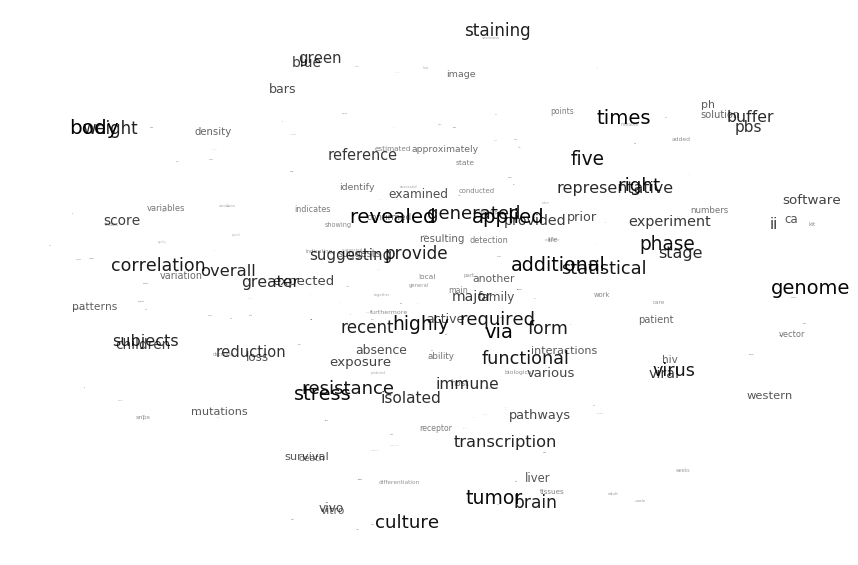

In [58]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

There is  one more step that can be useful for knowing if the parameters of the model are correct. Some commentary from the homework is as follows:

"Another thing to consider in training is how we know that our parameters for the model are correct. We can do this by looking at the training loss of the model. Let's tart by training a new model, but this time we will expose most of the options and train it one epoch at a time."

Instructions follow about plotting training loss.

# Doc2Vec

In [ ]:
keywords = [

In [ ]:
plos_dfF['tokenized_words'] = plos_df['Article Contents'].apply(lambda x: nltk.word_tokenize(x))
plos_df['normalized_words'] = plos_df['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = None))

In [ ]:
keywords = []

In [ ]:
taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs